<a href="https://colab.research.google.com/github/van112/Sentiment-Analyzer/blob/main/Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This block of text installs the the libraries needed to code the sentiment analysis, such as the pre-trained sentiment analysis model from hugging face and the plotting library to plot the different graphs.  

In [2]:
# Install necessary libraries
!pip install transformers pandas matplotlib seaborn

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline

This code outputs and generates the dataset. We used the help of chat gpt to generate a data set. It also creates a DataFrame using the pandas library and then displays the first few rows of the dataset.



In [3]:

# Load or create a simple dataset
# Here, we create a small dataset of sentences for sentiment analysis
data = {
    'Text': [
        "I love this product! It's amazing.",
        "This is the worst experience I've ever had.",
        "I'm feeling neutral about this.",
        "The movie was fantastic! I enjoyed every moment.",
        "I wouldn't recommend this to anyone.",
        "The service was okay, but it could be better."
    ]
}
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print("Dataset:")
print(df.head())

Dataset:
                                               Text
0                I love this product! It's amazing.
1       This is the worst experience I've ever had.
2                   I'm feeling neutral about this.
3  The movie was fantastic! I enjoyed every moment.
4              I wouldn't recommend this to anyone.


The code below calculates the statistics such as count, mean, STD, Min etc.

In [4]:
# Data Exploration
# Calculate the number of characters and words in each sentence
df['Num_Characters'] = df['Text'].apply(len)
df['Num_Words'] = df['Text'].apply(lambda x: len(x.split()))

# Display basic statistics
print("\nBasic Statistics:")
print(df.describe())



Basic Statistics:
       Num_Characters  Num_Words
count        6.000000   6.000000
mean        39.500000   7.000000
std          6.774954   1.549193
min         31.000000   5.000000
25%         34.500000   6.000000
50%         39.500000   7.000000
75%         44.500000   8.000000
max         48.000000   9.000000


This code displays the chart for the number of characters per data point in the data set.

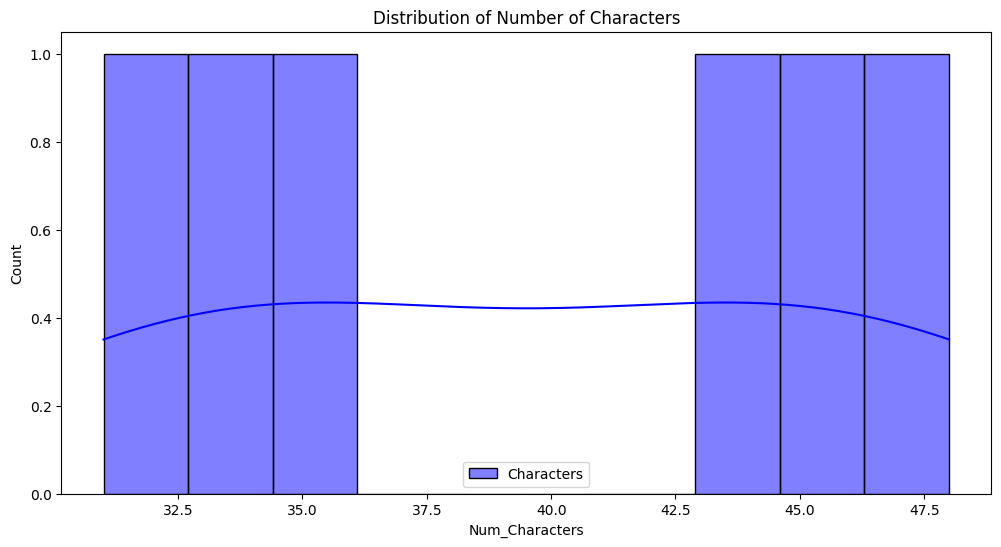

In [5]:
# Visualize the data
plt.figure(figsize=(12, 6))
sns.histplot(df['Num_Characters'], bins=10, kde=True, color='blue', label='Characters')
plt.title("Distribution of Number of Characters")
plt.legend()
plt.show()

This plots the number of words per data point in the data set.

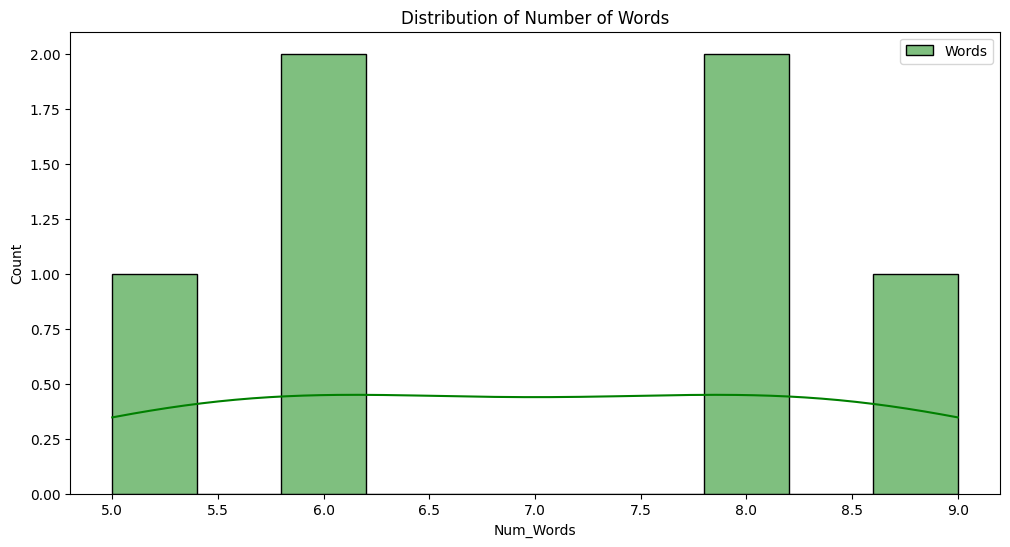

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Num_Words'], bins=10, kde=True, color='green', label='Words')
plt.title("Distribution of Number of Words")
plt.legend()
plt.show()

Along with the characters and the words we now display the sentiments for each data point as well. This is obtained through loading the sentiment analysis model, and applying it to each entry.

In [9]:
sentiment_analyzer("My dinner with friends was awesome")[0]['label']

'POSITIVE'

In [7]:
# Load a pre-trained sentiment analysis pipeline from Hugging Face
sentiment_analyzer = pipeline("sentiment-analysis")

# Apply the sentiment analyzer to each text entry
df['Sentiment'] = df['Text'].apply(lambda x: sentiment_analyzer(x)[0]['label'])

# Display the results
print("\nSentiment Analysis Results:")
print(df)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu



Sentiment Analysis Results:
                                               Text  Num_Characters  \
0                I love this product! It's amazing.              34   
1       This is the worst experience I've ever had.              43   
2                   I'm feeling neutral about this.              31   
3  The movie was fantastic! I enjoyed every moment.              48   
4              I wouldn't recommend this to anyone.              36   
5     The service was okay, but it could be better.              45   

   Num_Words Sentiment  
0          6  POSITIVE  
1          8  NEGATIVE  
2          5  NEGATIVE  
3          8  POSITIVE  
4          6  POSITIVE  
5          9  NEGATIVE  


This code creates a plot with the Sentiment distribution between the data points. There is a section for both negative and positive sentiments on the x axis and the y axis displays the number of sentiments.

<ipython-input-8-662d5518cedf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='pastel')


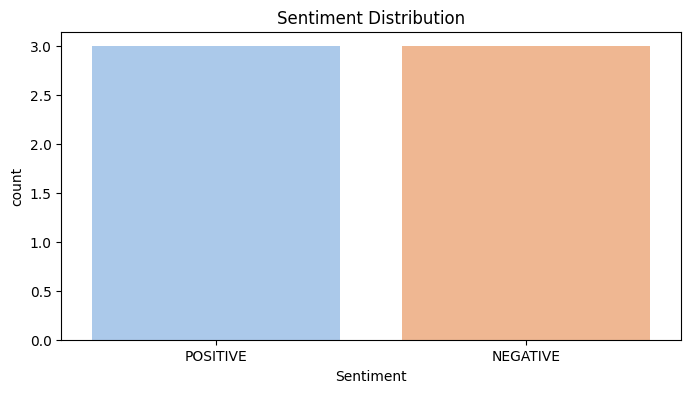


Results saved to 'sentiment_analysis_results.csv'


In [8]:

# Visualize sentiment distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='Sentiment', data=df, palette='pastel')
plt.title("Sentiment Distribution")
plt.show()

# Save the results to a CSV file for further use
df.to_csv("sentiment_analysis_results.csv", index=False)
print("\nResults saved to 'sentiment_analysis_results.csv'")
